In [29]:
import import_ipynb
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [25]:
%store -r train_descriptors 
%store -r data_validation 
%store -r data_train 
%store -r Y_train 
%store -r Y_validation 
%store -r validation_histo



In [21]:
def generate_hist(input,kmeans):
    data = []
    kmeans.verbose = False
    for img in tqdm(input):     
                histo = np.zeros(k)
                nkp = np.size(len(img))
                if(img is not None):
                    for d in img:
                        idx = kmeans.predict([d])
                        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
                data.append(histo) 
    return  data
     

<span style="color:#fff; font-family: 'Bebas Neue'; font-size: 1em;" >choosing the best K</span>

  0%|          | 0/5 [00:00<?, ?it/s]

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
 20%|██        | 1/5 [08:51<35:27, 531.89s/it]c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
 40%|████      | 2/5 [33:51<55:03, 1101.14s/it]c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
 60%|██████    | 3/5 [1:04:27<47:53, 1436.55s/it]c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarni

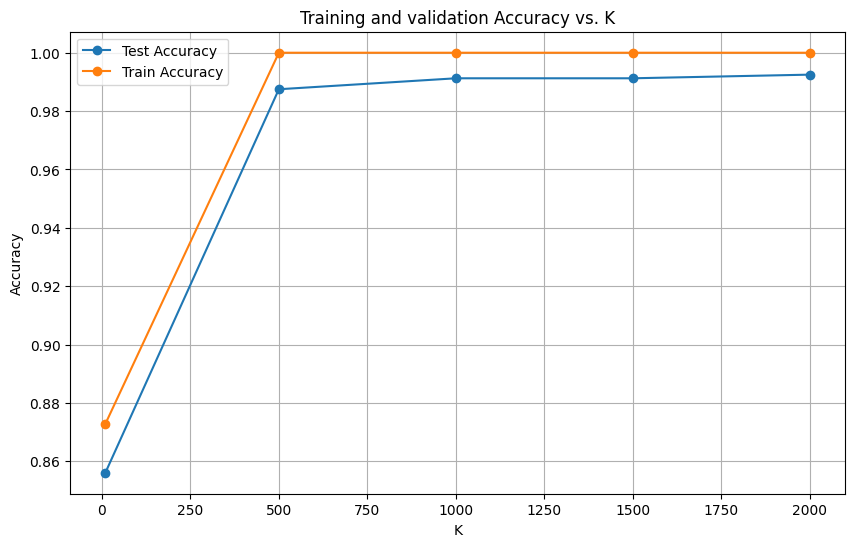

In [22]:
K = [10,500,1000,1500,2000]

# Lists to store training and test accuracies
validation_accuracies = []
train_accuracies = []

# Train SVM models with different values of K
for k in tqdm(K):
    kmeans = MiniBatchKMeans(n_clusters=k, verbose=0).fit(train_descriptors)
    validation_histo=generate_hist(data_validation,kmeans)
    train_histo=generate_hist(data_train,kmeans)
    model = svm.SVC( C=4)
    model.fit(train_histo, Y_train)

   
    # Compute test accuracy
    validation_accuracy = model.score(validation_histo, Y_validation)
    validation_accuracies.append(validation_accuracy)

    train_accuracy = model.score(train_histo, Y_train)
    train_accuracies.append(train_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K, validation_accuracies, marker="o", label="Test Accuracy")
plt.plot(K, train_accuracies, marker="o", label="Train Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Training and validation Accuracy vs. K")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Define the parameter grid
param_grid = {'C': [0.1, 1,4, 10,15],
              'kernel': ['rbf', 'poly'],
              'degree': [2, 3, 4],
              'gamma': ['scale', 'auto', 0.1, 1, 10],
              'coef0': [-1, 0, 1]}

# Create an SVM model
svm = svm.SVC()

# Perform a grid search
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(validation_histo, Y_validation)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 10, 'coef0': -1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
